In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
path = '/content/drive/MyDrive/Freck'
from google.colab.patches import cv2_imshow
import cv2

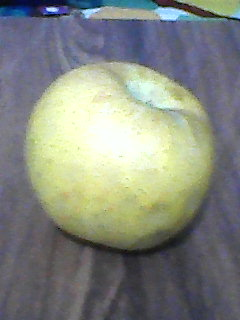

(320, 240, 3)

In [3]:
img = cv2.imread('/content/drive/MyDrive/Freck/Fresh/DSC_0000007.jpg')
cv2_imshow(img)
img.shape

In [8]:
# import sys
# import os 
# import pandas as pd
# data_dir = "/content/drive/MyDrive/Freck"
# num_of_classes = len(os.listdir(data_dir))
# print("Classes:",num_of_classes)


# # For undersampling data
# images = []
# labels = []
# min_files = sys.maxsize
# for label in os.listdir(data_dir):
#     files = os.listdir(os.path.join(data_dir, label))
#     min_files = min(len(files), min_files)
#     for file in files:
#         images.append(os.path.join(data_dir,label,file))
#         labels.append(label)
    
# print(min_files)

# df = pd.DataFrame({"images": images, "labels":labels})
# # df = df.groupby('labels').head(min_files).reset_index(drop=True)
# df = df.sample(frac=1).reset_index(drop=True)

In [9]:
# df.head()

In [10]:
# df['labels'].value_counts()

In [11]:
# df.replace({'Fresh':0, 'Spoilt': 1}, inplace = True)
# df.head()

In [12]:
# df['labels'].value_counts()

In [13]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, AveragePooling2D
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras import activations
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

def create_model(optimizer):
  vggmodel = VGG16(weights='imagenet', include_top = False, input_shape = (256, 256, 3), pooling='max')
  vggmodel.trainable = False
  x = vggmodel.output
  x = Dense(64, activation='relu')(x)
  # x = Dropout(0.5)(x)
  x = Dense(2, activation='softmax')(x)

  model = models.Model(inputs = vggmodel.input, outputs = x)
  # optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001)
  
  model.compile(loss='categorical_crossentropy',
                optimizer = optimizer,
                metrics=['accuracy'])
  return model

In [14]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                              patience=3, min_lr=1e-7, verbose=1)
import numpy as np

In [15]:
# from sklearn.model_selection import train_test_split
# train_df, test_df = train_test_split(df, test_size = 0.2, random_state = 42)

In [16]:
data_gen = ImageDataGenerator(rescale = 1./255,
                              shear_range = 0.1,
                              zoom_range = 0.2,
                              horizontal_flip = True,
                              vertical_flip = True,
                              validation_split = 0.2)
train_generator = data_gen.flow_from_directory('/content/drive/MyDrive/Freck',
                                               target_size = (256, 256),
                                              class_mode='categorical', batch_size = 8, shuffle=True,
                                              seed = 42, subset = 'training')
val_generator = data_gen.flow_from_directory('/content/drive/MyDrive/Freck',
                                               target_size = (256, 256),
                                              class_mode='categorical', batch_size = 8, shuffle=True,
                                              seed = 42, subset = 'validation')

Found 180 images belonging to 2 classes.
Found 44 images belonging to 2 classes.


In [ ]:
model = create_model(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001))
history = model.fit(train_generator,
              validation_data = val_generator,
              verbose = 1,
              epochs = 20, 
              callbacks = [reduce_lr])  

58900480/58889256 [==============================] - 0s 0us/step
Epoch 1/20
4/4 [==============================] - 134s 33s/step - loss: 2.9098 - accuracy: 0.3934 - val_loss: 0.5664 - val_accuracy: 0.9333 - lr: 0.0010
Epoch 2/20
4/4 [==============================] - 111s 30s/step - loss: 0.7120 - accuracy: 0.6148 - val_loss: 0.8617 - val_accuracy: 0.4667 - lr: 0.0010
Epoch 3/20
4/4 [==============================] - 111s 30s/step - loss: 0.7146 - accuracy: 0.5902 - val_loss: 0.9433 - val_accuracy: 0.4667 - lr: 0.0010
Epoch 4/20
4/4 [==============================] - 111s 28s/step - loss: 0.8137 - accuracy: 0.5820 - val_loss: 0.3661 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 5/20
4/4 [==============================] - 111s 28s/step - loss: 0.5905 - accuracy: 0.6475 - val_loss: 0.2457 - val_accuracy: 0.9333 - lr: 0.0010
Epoch 6/20
4/4 [==============================] - 112s 28s/step - loss: 0.5392 - accuracy: 0.7459 - val_loss: 0.1286 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 7/20
4/4 [=

In [ ]:
model.save('/content/drive/MyDrive/Freck/model.h5')

In [53]:
test_img = cv2.resize(cv2.imread('/content/image_2021-12-02_015219.png'), (256, 256))
img_arr = np.expand_dims(test_img, axis = 0)
img_arr.shape

(1, 256, 256, 3)

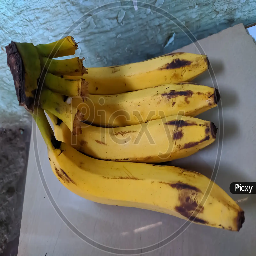

In [54]:
cv2_imshow(test_img)

In [55]:
model.predict(img_arr)

array([[0., 1.]], dtype=float32)

In [ ]:
from keras.models import load_model
mod = load_model('/content/drive/MyDrive/Freck/model.h5')
mod.summary()

In [36]:
arr = np.array([[0.3, 0.7]])
arr

array([[0.3, 0.7]])

In [37]:
np.argmax(arr)

1

In [39]:
arr[0][0]

0.3

In [21]:
train_generator.class_indices.keys()

dict_keys(['Fresh', 'Spoilt'])

In [24]:
b_str = "/9j/4AAQSkZJRgABAQEAAAAAAAD/2wBDAAoHCAkIBgoJCAkLCwoMDxkQDw4ODx8WFxIZJCAmJiQgIyIoLToxKCs2KyIjMkQzNjs9QEFAJzBHTEY/Szo/QD7/2wBDAQsLCw8NDx0QEB0+KSMpPj4+Pj4+Pj4+Pj4+Pj4+Pj4+Pj4+Pj4+Pj4+Pj4+Pj4+Pj4+Pj4+Pj4+Pj4+Pj4+Pj7/xAAfAAABBQEBAQEBAQAAAAAAAAAAAQIDBAUGBwgJCgv/xAC1EAACAQMDAgQDBQUEBAAAAX0BAgMABBEFEiExQQYTUWEHInEUMoGRoQgjQrHBFVLR8CQzYnKCCQoWFxgZGiUmJygpKjQ1Njc4OTpDREVGR0hJSlNUVVZXWFlaY2RlZmdoaWpzdHV2d3h5eoOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4eLj5OXm5+jp6vHy8/T19vf4+fr/xAAfAQADAQEBAQEBAQEBAAAAAAAAAQIDBAUGBwgJCgv/xAC1EQACAQIEBAMEBwUEBAABAncAAQIDEQQFITEGEkFRB2FxEyIygQgUQpGhscEJIzNS8BVictEKFiQ04SXxFxgZGiYnKCkqNTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqCg4SFhoeIiYqSk5SVlpeYmZqio6Slpqeoqaqys7S1tre4ubrCw8TFxsfIycrS09TV1tfY2dri4+Tl5ufo6ery8/T19vf4+fr/wAARCADwAUADASEAAhEBAxEB/9oADAMBAAIRAxEAPwBlzpsM7JKYf3sfbdw1R6fcxvIYLmJI5uybs7h61b35jj5E1Y0lhiXBCL7U63t4It2yFNrHOKYcqKBtUsLxTFENrvwDznPar72Vq15DdtD+8hUjb/CahO2htKKepW02za3F2JljZHkVoGD7srg5q75Uf9wUPUfKh3lJ/cFL5Mf9xaWg+UPKj/uCjyo/7goHYPKj/wCeYp/lR/8APNaB2Irm1jmhICKDUunmOSLY0Q3pxQS4lzyov+ea0eTHj/VrV3J5Cq8EYbHlrTPKi/55rSDlDyY/+ea0nlR/881oHYPKj/55rSeVH/zzWgOUTyo/+ea0eVH/AM81pXFyohubK3u7aW3lTCyrtyOq+9eZax4fvNIG6Zd1vnb5w6Zp3KXusy8Y7UxlpW6lsYUNMIxRyjXcWlpdAuJQOtFhCGk7U7BcbSigZ7TG/r3pJbZGuFuVT9+i7QfamcqGW0pkaRXUqKtd6ZY+WMTxbH6Z3D2NJcEeVKzts4OTSHcr2Fuba28n93sDHy/LOfk7VbqTQdTsVIxnz+ft8v5Nud+e/pT8VQC4pcUDFxVWbfbzC4T/AIEM0EmojK6hkOVNPxQSRSplar4oAQikxTGGKTFIBMUYpgNxUdxBDc25guolmhPJRqBHm3ibRBo+pBYmLWk+TDuPI9qxWXb1NFyiMim7aq/ulDdlJSAbS1ImNNN7VTEFOjXL0DPUx5mmtFBKC0XzMZfctwK1YZencHoQaOtjDzY+aLd88f36WFsj5hgigZY+6M9qhvgHtdnmCMyEIpPc+lIqI2yjljs40uDmVeuDn6VZFK66Gg4CnYpALijFABiloGOxQyB1INICGxk8q4a2fufk5rTqkSwIqpIm1qYiPFGKQxMUmKADFJimA2koEVNS0+HU7A2l1u2Z3Ky9UPrVLQfD0Wm2VzHd+Tevckbt0XAA7VOoFbU/Bel3KF7QvYS9Tt+ZK4rU9BvLBix/fQdpIxVDTMrH5U1x6Ck9iiI0nel5AI/NMpgFWYFwtFyWexyQxXMBimQPG3UGsFvO8PNH5mZNNPyZGBsOa0sYpXZ0ceQdp5plzbs2HiOHU5x2b2qCiS1n81MEMrD7ysOlVdahmmsjb2Zj+0f6xVkbFCY7E8Abz7jPTdjqT82BmrNSjUfTsUCHYpcUAhMUuKBi4p2KGBBdQll3J99elXLKbz7fdjBHBpoTLGKjkTctBJVxSYoATFJigBMUYoAbto2UwF20u2kIivBi1bHfisnyWP0plI57V/CJdGn0vhhyYPWuPK9QwIYdQaGikVWXBqOl1AQ02gTJEj9asDoKi3QR65EwMayQsHiYcEVY4dCh5Vuo9a2MeomzaOKmjPrSKI7mI58+HPmKMED+MelV72C4k1Czlt8lYyFYLJjGSOakqIWU5cqpX/Xb5wf+BVogUrWNL3HU8UALS4oAXbS4pALS4oAdiqWfsN4H58txzimBsDpS4pkFWZMNUWKBibaTFAhMUYoAMUYpiFxS7aAEkj3jFMW1oAmW1FZuveE7PXoc5+z36jEdwO/tTFc8h1jTLzStQe11CFopR6/xCs+pNb3I2qWJPlyaTEx1SdBT8iTpdOvrnTHae0Z2hV8TW7/d57V2Wm31tqURmspM7fvxH7yU+pMtXzGkKT7p9qYiUGsieR4NTmnIIHlMM7cDhallRZds12ZTvFDFH+mTVwVOvUr0HinUxjhTqQxw5zjB2nBwelGKLAGKcBQA7FMmhE0RQ0AxmlzdbWTO9fu1pYqiGNkTctVCKBDdtJigYmKKAFxRigQu2nhaYEgSpFSgRII6kEdMk89+Leqaf5FtpAjSXUY28x5u8C/3K8tc0jSGwzlzxUx+VQKQxUFDcVHMF0d7YW+oXevz3F/p8kFtJbbHz91iMbTVPUdNvNIvVvdNcR87kxV9dwWmh1eh6tFrFoXVRFcxAefD/d960fvrTIBeDisi1DXa3untxvUt91h5eT8oo2AvW8/mX7vt4vPm7jZKvBSrwpPUuw4VJUjHCnCmByd3rLaP46vPN5sZlh84f3f3Y+auvXayJJG6vG67kdejCiW4ohinYqSh1LimBTvInVhcRYynNakEouIRKuOeuOxpolkuKrTx85pkkGKTFIYmKMUwDFLigQ8LTwtMCYLUyx0xEyxVg+OPEUfhnQi8Tj+0rn5bZO49XpiPAnkkldpJnMkjnczt1JqMjikakkFPbk1HUB3RaryPk1SRJ68khhVI7g542iTtWLren2Mvi2ybVnkhtJ4DH5qnG2QHil6CZX0K0lLy6hphMlxYzmBlJx56HpXXQXEcsYlh3bT1Vuqn0oQO5NdSBbKaTn5UJ4+lUYrmd9Mt3Zm3Q3EPnZ4PlEZpvuNMtXULszwZKmf7jsNwjlHSrNtN9ogWUhVY/eUdj3qVsUWKctIY8U8UAee+LuPFl0CMZSIjPf5FrovAkhOgXquTttrhQi/3QVzVMlaI6XFGKkocKa5WNGdztRRkk9qQGbc6xF92CITqRyXOBTdL1KKC62SErHJ19jRzEHRoVYZRgw9qHTcuKsRSZNpxTcUhiYpKYBinYoESAVKq0ATKtWI0qriI9W1K00PSJ9Sv2xDD27uewr538Qazc69rE+o3v35D8qdo17CmEDKphNSaktspPParGKkkZKcJiqmaeoJHr26S1/d3Q862YYEwHT/Zp1xAk1j5NzH9qsn565ZfRqpiJdC0u105ZILRnMd1MHO85xWRY61dS3D3Fxpvk2bT+R9pToG6AVIG5fTG302d2t1lZfkMMnRvakjhtdtu1ssQsrkv54I5dnHFDuUTrH5lo9tvXzIcbW9P7hqZJMO0mODgyr/dPrQMuIQRkcg0/FIBwp4pCM3X9FTWbNQrLHdw/wCpkbp9Ki8O6Rd6Npuox3j27GaRHXyWJ6KafMtg6G98vAzyegpcUhJgBWV4sYw+GZiF/wBbKkX580hnE6ffsLvyZW+R/un0rXY1kBe0u+eFggfHpXT2N+s+I5OJO3oauLJJ7iP+Kq1aiG4opDCnUCHip0FMCygqffHFE8szbI41Ls3oBVEnz/4w8WXHinUfMO6KxhOLe3z0/wBqubPAyaTNUtC5qmlXukzJFfweVI8YkA3huDVFFzIM9M1N9ALxUAcVA5xST0JK5bc1MPWqTKPacZyD0qDy5Lbe1su+JjuaL+7RchEkOPLS4s+f9jpWVquj3d1aXseiywR2982+5t5eMN60iupv3kUUtrsuH2pEinzF/hKr96obW3NtHDYmSSWKaNmFyMfezmgLdSwjOxSWTIkj+SZcfrU+Fkk/dsnnp0+lMYze8Cu6RF1H34l6r71eHIBHQ80uoyQU8VIDqbcf8e0n+4aAKN1uzHJgjKKVP4CtS1Jmtlc9e9SneRnsPxXKeNLS5hhW9iu5fssxEctvI25d/wDCapmhw7sfxrb0+6M9vhvvpwaxt2EWC2OnBrYsbrzV5Pzd6LknTadd/aY/IkP70Dj/AGhSuu1q2QEdIaYCZpwNMCRanU0xFhGqwhGOQCPegk57Ufh94W1SYzPpxtpT1a0cx5rPi+HXhXR9Ri1KS6uXjtMytDM+8HHejUameR+INYfXtcu9TkGBO37tf7qD7orLjH71frQzQtE/NVGZsuamIiMGlNXsFj2mlqRIryY+1fupPKuOvI+VqmRhM+Nvk3H91jTGOWWQ/Z5yj+XkxTxYz7UW8Oy3ay8xmaHmBpOuO1AyZvnQkfIkqGKQf7XQGuV8SX13puuBLV9rwQRKGI6kCot7w7m/o+tQa6mz5bbU0GTGekg9a1ra58y4kt3VVkjGflbOR61Qi4KeoO456dqkY+obh18mWPPzGN+PwoYIbs+0abaL/GY48H8KXTWKb852KG/MGlGOtzGReRvMTeK5/wAeD/il0I/hvE/k1UaHnL061mNvMHX8fpWF7FG9kOu4UsE5hlyKVyToLefO142ww5BroIrgXlr5wHzLw49K0gxERajNagJmjdQA8PUytTES+eqdTSG+P8C/nQSRNcSyffc/QcCuM+Jes/YdFTSYf+PnUPmk5+5FTuFjyhzgYFFr81x9Bmk9jVFhutU5vv0hXIqXNMdrHtNOFAkU/vakexBH44q/LCJ48Z2uPuOOqmgZDGxLLujwk37uXPykSCphkLnlpIeM92WgQ64i86GSBSMTrgHtmuL8VN5viS+fvlRj8KpfCR1McF45FkibZKnKuOorv/DHihNSYWOoHy73/lnIekvtUWKOm+797A+tPFIsfVR0HmTcctvP/kMUdBFnTgJNKtc/88xVxUzGY+xqrGRVsjgyxPwwaq3iS1+2eGb+ED5gnmp/vLzWaNInk8jjd8vNR1m0WaOnXOEeNv8AgNWY5hKu5ajcg0tMucNsJ+lbltcmGYSjp0YeopxYM1SQRleQelM3VuAbqN1UIN+KXe1ACin5piGzXMFpbTXV0cQW675PpXhusapPrGrXGo3IVZJz91eijsKq4kZjHJq3ZJgFj1NRJFj34qk53ZNJXAizRVMD2unUANSLEzSDqxzVgUgK0seJiv3Ybv5GI6rJ/CasKxJExGGX5WApjJ7fCSrF26qK851smXX9Qf8A6bsPwFCYikV2NtIx3pSgK4Iqhs7fw94h+2Riw1eX97/yyuD+ldOkRhmy5/ekAEgcPWYrloSx7NzMq+u41EhWVmaNgyktz/wEUDFsJGj0m0RFy/lDrWlbv5qZ6HuKL6mZD5B+1b+/f3qdPlccZHcetFho8Y8V6a2jeLJrSIMbZv3sXy4G01THKg1DLQqNtYVrR4ePcpzWUwY+N9jgjtW3Y3gkTt70kI1rS5/5Zdv4auVtFiClxWgBTulAhDIg6sBSrdW4/wCWckv04FMZxPxN8QedDFoFtFbxIuJrjy+ob+EV5uTxTGtiKtK24tlHelMZHcHEZqkOhFEdiRneihos9qpwpsketSCkASRedA8WdpYYB9D61HDL5hEp+VZP3ci46P2oQFn/AFcbM2PkBwa81vOdRuCenmk0faHYshM2+FSSS1H8RPzRVHc2pgw/zeS/3GNBmSWyZ6V3GiamJIxZ3f3P4HP8PtQ0WbbiaKYAWJuZO03yjAqb980ivNsUDPyg5PIqZK4yGWIx2qEfwgLVzTZt+Q3Xipv7xkXmFQ96tlxOX8f6QL/SI7+NM3Fj74/dnrXmzLtWs5bFkOcVas5sS7Sx2GoaAtsRuqxYy+XP9eKzA3IpCRW9Zy+fDnuvBrSBJPUTXCDpzWwiBrliflFRsZG/iIouVyiBRUyNtYUDPJ/GcX2bxjqY37t03mf99DNYBquUlCwLvlUHpWlUyGyvd/dFU8VSEMPWkFBR7UpPcVIKGSOWpBQMkFQSKVuhn/Uz/I3s/wDDRYBt5cY0q6z/AKyOJge/auFvk/4mU+O7/wBBU7MfQijaSGctEcN09a07Uqzv5IRj/HCzZ3+9UQx0EC7maLoDgr/drRCZTFGqA6bQri4OjDrMy3HkJu/hG3Nau18xtcT5+bARFwu6h7huhZ8eQCejow39l9KnsrcpLJt6AjHvxUW94h7CxTMb8hmyBuX9am7mi5URdqOrRyjMbjaw9q8d1vTn03UZ7Jv+WbnafVe1RK5ojIK4FIhxUiZdiUSjO/DVIuU71En0A29MlzB97OK0oLl7eXcjYz1oiBo8yfMTTttbjFxSUxiUmaBHmXj7nxbcn/pnF/6AK5mtSVsXbRAE8zv0qdqzYytcH5RVXvVRQhjUi0FHtdPouSPp4oGPWmXfzJajGf8AS4z+ADGmkIztX+XT9Wbu0Z/9AArltQyNYmwP4l/9BFR9ofQQ/OeetOj+V896rrYl7Grby+YRuwH6AgVfC7hwOaZK0RuaGZBpB8nG43W0kjO37vNabLFAFmup2YqRtLnHNS9zToS74/IEbkbegb61btjsk8s8YpEFW6+W93r3q2etR1CItcd8Q9OzDb6rEvT9xNx+RoZoefSDFQVFgJbeTYwq0zVNhE9nP5cn1raEvFQBqaVcCVGiz8ycge1aFbIY2mmrAbTTTA8/+IdqItYt7n/n5g5+q8VyAUk8CrvoJF6L5F21J2rO4MpO2XqI9a02ENJpoo9BntQ60+h3EPFPFIY8Uwndqtjbj+MSP+WKAMTUbnzvDN1cJ92VJMf99YrE1P8A5DE/HG4fyFC0lYNOU0NKs4Li3uVnEat5q7WZtuKqm3kjCs4GCobK80ud3IuTRe1XUbPWqA6HRJHXQL5om2yJKMH0yK1o4ore4IgikluF4M0lIskIyrRzIjBhhl7MKzHvJdClT7SHuNH6ef8AeltqQtzeULIyvuWSNhuVlOQwp7feoFEKhv7Qajp09kf+W6bR7N2pFs8aulaOV45F2yIxUj6VSbis7BYZnFW45Ny4qBC7sGta1n3xc1LYDh5kWq217byFWi4YdmXuK7FWDoGX7rcitIDQU2tRjaSgRzXxBs1n8OxXf8VrOB/wFq86jbY9VrYRMaN9SBVPBoNVICI0goQ9j2hTzT802IkFSCgBwqleRzvc3Etrnzo7Boo8ddzNmqi0hMxJ8nwisJikhDSeUiyLtOC/FY91Lv1K4z180qfw4qeVt8wpaaFiNst9a27eSFNttOpMgdUz/CRuqHsRcbd20cEy+S+9X3H6c00DiqRVza8PSZ0vV4T1BR/0NdPn97J/vmkXcXrSJENjCb97vGHz/FQMj0m0XTWNvEf9DYlkVj/qjV2X79BPUQUuako88+IOn/Z9XjvU/wBTdpz7OMVxr1DHHYrtTo3xQhE+7vVm1nKNis2riNIScVt6Bd7ka3b7wOV5pxdho2KbmtRjaKoRQ16MT+GtTjP/ADwLfiOa8gPqKsVx0cmBtbpUlIaIZDSN92rERUd6kZ7N3qQUEjxTxQCJFqvbMxluHZABMRswc8JkUrFXMzXpQiQlhu2zCUj/AHQTXFbm/jbL9WPqaqMSS3E7beOa7FLy11u4aFYxCxBk3bfmX95gLUNW1RKIZ7Z4gCnmyQD/AJaNGVpvaqC5d0I7bjUU/v2n8mFdaM+bJ6FsiiQ0PBp4qCh1LSGLRSAy/E1j/afh24gQZmj/AH0X1HavIHO7mhoCB+lRVCQMsJyKkHWkyS9DJlRVqGdreZZk6qc1Azs0kWWNZI/usMiit0UNzTc0wE2LcBoJPuTKYz+NeNTRG3nlgbkxOU/I1fQXUgYUqsVoBsax5pAarZAJQKWwHsuaeDQSPFSCgZIKaIkEjSD7xosBy/i6Ro49ytj5fL+u41yXmVdtBFm3n2muh09ElIZD8ynijzJZ09jLL/q7zMysVHzelRNaebCkkEbCVz/qx0qUhegnh0Z1w5HyNayA5HutdVmod7mi2Fp4oGOBp2aQgzS0hio+xwfSvKPF+mjTPEE8ca4gm/fRH69aBdTnJKiNStA1HI3NT5pASxSYNXRJioYHReHL0PG9o331+dOeo71s1pHYpDDTc1YCZxzXnfjmzNtr32kLiK7G8Y/vfxVSJZzZNMNPYQhpKAQZpRTA9jFSCkIetSCi4yQU4UDOL8aljexRL93HmH+VcweKrYSFWtHTrxoLpCpIHepuI76wv4ZACxxXUWUVhIAfNWMnvTRmLNoz27xX0UyNBGjjj0bFRUpb3NY7DxT6koUUtAh2aWkMK5vx1pv27Qvtcf8Ax8WPzfWM/epoDy6QZ+lQYqAaGVYjbIolsIXo1W0fK1mwLdjdNbXUcq/wmu33hlDL0YZq47jQzdUbPVARs5rC8aJ5nhYuf+WV0n6hqpAzzsjFNq9wEPNJSYhKAOaAuex08UMklU09aCh4NSCgDkvEFu15r6ohCNgICfrXMXEeHIZPLmU4kTPSqUbkkFSKaVupRqW99JEBjG2r8GvXEQxG31FMzOj8J+JLy71GXTGOYJbdpGz224rqM1nc0sPBpwNAx+aM0hC5pc0xi5o+U5WQZRvlYe1ITPHdd046Tq09keiHKe6npWQaiw+hGacGxT3EyQPmpYmqbCRYBzXU+HrnzbFoSRuhOB83ago06bgVYxpqjrMJutFvLcAtujyoHqORVolnlv3qbTASko1GNNKOtFxHsVOoESA1IKNhjxUgNAzLmsQupxzhn3lt3A3DAqj4q0Ka4gbXLNVkhOA5Xv71d7kHGY9aYOvFSiiXPHNL3oepJ1/w8gZ9T1G9x8sNuIQfdzXcCpKHinA0hjs07NIQZpc0xi7qM0hHJ/EDTftOmx6mn+stPkf/AHDXnEgpMLEBpDQDI0fbJVpW5pWAtK2RV3SLs2mpo/8AA3DVIHaHio6ooaTTPM2HcOoqhHmuvWS2OqyxxgiM4dfxrMrQQlJQwEpR1qdwPYO9LVEkgp4NSxjxUgoGQXDlJpW5xHaMc++ahz9nSToD5ahvfbEDT21F5FDU9Bs5XbCC1l5G6IZWuWvtHu7P94R5sH/PWPpWl+ZAUxzS9OT0rNgd/wDD8BfD93Jn/j4uh+SLXTg0hocDSg0hjs07NABmlzSAM0ZoAa6xzRvDMMxyqUYexrx7VbCTTdQmspBzE3HuvamIzmplJjIJakhk+XFAWLcJqfPY1DA7HRrr7Tp67jlo/larZNOIxhNRueKoRx3jGM+bayezIa5mr6kiU2kxiUq00B69nmn5oZIoNPBxSGPzTm3NEyqdpIxnNOwFOWLyNJufM5mmXEjb8+uKkuj5uoS+kiSkfT5BQtrBuLeS5meX/abr/vNSPbqCdnycYOPu0PSzC+5m32hxXXzRqkMrLlGjHD8A1itbaxotxmN2i2n5Z0AOarSohHfaXdzXumR3Nzc/apHZ/wB55YTOGq6DWZew/NLmkwFzS7qYC5pd1IBM0uaAG7q5Lx9p++2h1OLH7v8AdTD1HY0COAkFQ0ugyNuRUSnZJiqAuqeKmV6z3A2PD12Yr7yT9ybj8e1dQTSSGMJqMmrAwvEsXn6Q/wDehbzRXEdelXcQhHqaTIHakG4hNJRYEet5p4NaGY6nZqSh9SL0pgPGD94Aj0IqhB5n9of6Vhcoxz7GVaPMCKBvOsEZ85fJP/fTVbRz5Mhbknd/7NSnJWQlu7h0uYuf+WOP/QKmifzI1UhSrHuMjoKlaal7ly0iS2tUgjUKqdhVnNAh2aXNMBc0uaQxd1JmkAbqXdTATNRXEMd5ay2s33Jl2GgR5HfW8lrcy28y7ZI2INUTQNDajdcnigGidD8tSA1ArE8UhjlV1PKnIrql13TnGftGD33LiiwyxHd28/MNxE+fRqcxphcz9RAktZUPdD/KvP8Af8oArQkbSUFCUg60LcD1rvTgadyB+eaeDSKHU8UXAhubt4n2RW7ytlV4xjc2cCmvFJFDG9zKJLm4u4Uk2/dAyTtosAqLEdS+y5IAAY85xxUNs7C3IfrtbP8A3xS5bRC92SzvsvWz/Ar/AJ7wKfbSrugUH720/ksYpS2GjVBp+6qAeDS5qQFzS5oAM0UwDNGaQCbqQmkBx3jqw+eLU4wMY8uX69q4mQU0Iho70xkgPFLn5qiwD81DK2HoAYCM9Ku2up3dr/q5dyD+F+ap6iL412OYbbhfLJ4OORXMtH5bEcEdiKSAYabWgCUUgR6vnmng0NEjhUlIY4GnA0DEMMbzpMU/eJ3zUPmfbLxFj/1FtJ5nmZ+8/NMQ9Itt7d3UvJ5Key46VVQ7nxnjyi35xpQrsHYkMm7VgcfeuZO3H+uap5ZbZfNujg+VcCP5e2dtK11oPZmmflOD1FOBoGOBp2aAFzRmkAZpc0AGaM0AJmkzSAgvYY7uxntpm2xuhyfT3ryeReOG3DsfWgkrNTRTGOBp9IA3VHIpc8UuoxB8vWjIrQCJjzTDSYrkbCmU+ghKSkM9WzTgasgdTwaljH5pymkMz9TtpLm4t/3JmhA24D42OT96tRQiDbEoVB0AFPQQy8k8uwuX/uwsf0qpFaT/ANoeV9rOZLXeM54+ZOKlfEU7cpb0lg+moWAf99IfmXv5hp6WqCOeNvmjlYNtz93Gaq4F3fuJJ6mgGkMdmnZpALmigQZozQMXNJmgAzTc0Ac3441P7Lpa2MZxLefewekYrhUk+TZR0ERNTKLjG5qXdkUhDTxTS9NDQ3dkU3ODVAITTaAENR96VgG0UxWPUadmqZCHqafmpGOFPFADhTs0DKxcag8lujf6JGcTMOsp/u1ZDZ1KU9xCv4c1OzHYSJxFfSwN/wAt/wB9HhOP9urWaAFzTs0DHZpc0wHA0ZpAGaM0wFzSZqQE3UmaYHnfjEk+J7n/AHYwPptFYBNNghu+jNSgEpQcVRI6opTSGMBpSaoY2gUxCimsKQDaSmM//9k="

In [26]:
import base64
mystr_encoded = base64.b64decode(b_str)

In [27]:
mystr_encoded

b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00\x00\x00\x00\x00\x00\xff\xdb\x00C\x00\n\x07\x08\t\x08\x06\n\t\x08\t\x0b\x0b\n\x0c\x0f\x19\x10\x0f\x0e\x0e\x0f\x1f\x16\x17\x12\x19$ &&$ #"(-:1(+6+"#2D36;=@A@\'0GLF?K:?@>\xff\xdb\x00C\x01\x0b\x0b\x0b\x0f\r\x0f\x1d\x10\x10\x1d>)#)>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x95\x96\x97\x98\x99\x9a\xa2\xa3\xa4\xa5\xa6\xa7\xa8\xa9\xaa\xb2\xb3\xb4\xb5\xb6\xb7\xb8\xb9\xba\xc2\xc3\xc4\xc5\xc6\xc7\xc8\xc9\xca\xd2\xd3\xd4\xd5\xd6\xd7\xd8\xd9\xda\xe1\xe2\xe3\xe4\xe5\xe6\xe7\xe8\xe9\xea\xf1\xf2\xf3\xf4\xf5\xf6\xf7\xf8\xf9\xf

In [30]:
import io, base64
from PIL import Image

# Assuming base64_str is the string value without 'data:image/jpeg;base64,'
img = Image.open(io.BytesIO(base64.decodebytes(bytes(b_str, "utf-8"))))
img_arr = np.array(img)

In [ ]:
img_arr

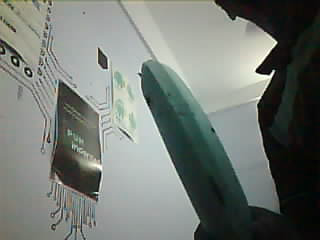

In [33]:
from google.colab import patches
cv2_imshow(img_arr)